In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [15]:
# !pip install faker

A project that involves analyzing data on consumer spending can help distinguish between real variablity in spending pattern and random Variability.This Can Inform Target marketing strategies.

In [16]:
dataframe=pd.read_csv("SalesForCourse_quizz_table.csv")
dataframe

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


# Random Analysis 


Adding payment method it will be required in analyzing customer spending pattern

In [21]:
import numpy as np

# List of payment methods
payment_methods = ["credit card","cash","mobile payment","DebitCard"]

# Randomly distribute payment method
dataframe['Payment_Method'] = np.random.choice(payment_methods, size=len(dataframe))


In [35]:
freq={}
for i in dataframe['Payment_Method']:
    if i in freq:
        freq[i]+=1
    else:
        freq[i]=1
freq

{'DebitCard': 8586, 'credit card': 8763, 'mobile payment': 8780, 'cash': 8738}

In [27]:
dataframe['Payment_Method'].value_counts()

mobile payment    8780
credit card       8763
cash              8738
DebitCard         8586
Name: Payment_Method, dtype: int64

In [40]:
len(dataframe['Customer Age'].unique())

71

In [45]:
dataframe['Customer Age'].min()

17.0

In [46]:
dataframe['Customer Age'].max()

87.0

In [55]:
t=0
for i in dataframe['Customer Age']:
    if 18<i<25:
        t+=1
t

4349

In [41]:
dataframe['Column1'].unique()

array([        nan, 2370.      ,  398.      , ..., 1971.      ,
       1568.      ,  687.344828])

Question No 1

What is the distribution of customer spending in our business? How does it vary by customer segment and over time?

Steps For Solving this Question

# STEP 1

Customer spending by segment. We segment the data on the base of change and check the variation that what type of age group spend more

In [133]:
#cleaning of data (filling and dropping)

In [177]:
dataframe=dataframe.drop('Column1',axis=1)

In [181]:
dataframe=dataframe.dropna()

In [182]:
dataframe.isnull().sum()

index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
Payment_Method      0
Age Segment         0
dtype: int64

Using pd.cut() to segment data can be helpful when you want to divide a continuous numerical variable into discrete categories for analysis. It's often used in conjunction with groupby() to summarize data by category,

In [197]:
#Customer Spending age segment
dataframe["Age Segment"]=pd.cut(dataframe['Customer Age'],bins=[16,25,35,50,100],labels=["18-25",'25-35','36-50','50+'])
dataframe

<ipython-input-197-2db53218c7af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Age Segment"]=pd.cut(dataframe['Customer Age'],bins=[16,25,35,50,100],labels=["18-25",'25-35','36-50','50+'])


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Payment_Method,Age Segment
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,DebitCard,25-35
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,credit card,25-35
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,mobile payment,25-35
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,mobile payment,25-35
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,cash,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,03/22/15,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,credit card,36-50
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,cash,36-50
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,cash,36-50
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,mobile payment,36-50


In [198]:
#Now Calculating the spending depend on the age segment
AgeSegmentSpending=dataframe.groupby('Age Segment')["Revenue"].sum()
AgeSegmentSpending

Age Segment
18-25    3141072.0
25-35    8028242.0
36-50    8556148.0
50+      2619114.0
Name: Revenue, dtype: float64

# STEP 2

Describe the distribution of spending by descriptive statistics

In [199]:
DescriptiveStats=dataframe.groupby('Age Segment')["Revenue"].describe()
DescriptiveStats

,count,mean,std,min,25%,50%,75%,max
Age Segment,,,,,,,,
18-25,6076.0,516.963792,636.803517,2.0,84.0,222.0,729.00,4550.0
25-35,11826.0,678.863690,743.035003,2.0,116.0,392.0,960.75,4113.0
36-50,12696.0,673.924701,770.476732,2.0,106.0,335.0,962.25,5082.0
50+,4268.0,613.663074,728.402087,2.0,92.0,285.5,848.00,4266.0


As we can see that std is bigger than mean because std is highly sensitive by outliers and by seeing rougly we can clearly see that there is huge difference between max and remaining quantiles. We can also see by visualizing the data

In [200]:
#Checking the distribution of data by rough analysis
#Difference Between the min and max and assuming outliers

In [201]:
ff=dataframe.groupby('Age Segment')["Revenue"]

In [202]:
a18_25=[]
for i in ff:
    if i[0]=='18-25':
        a18_25.append(i[1])
max(a18_25[0])

4550.0

In [203]:
a18_25_Out=0
for i in a18_25[0]:
    if i>=4000:
        a18_25_Out+=1
a18_25_Out      

1

In [204]:
a25_35=[]
for i in ff:
    if i[0]=='25-35':
        a25_35.append(i[1])

In [205]:
a25_35_Out=0
for i in a25_35[0]:
    if i>=4000:
        a25_35_Out+=1
        print(i)
a25_35_Out      

4113.0


1

In [206]:
a36_50=[]
for i in ff:
    if i[0]=='36-50':
        a36_50.append(i[1])
a36_50

[79        873.0
 80        751.0
 81       2340.0
 82        707.0
 83       2340.0
           ...  
 34861    1487.0
 34862    1971.0
 34863    1583.0
 34864    1682.0
 34865    1568.0
 Name: Revenue, Length: 12696, dtype: float64]

In [207]:
a36_50_Out=0
for i in a36_50[0]:
    if i>4500:
        a36_50_Out+=1
        print(i)
a36_50_Out

4923.0
5082.0


2

# STEP 3

Use visualization such as histo or boxplot to visualize the pattern and the distribution and patterns

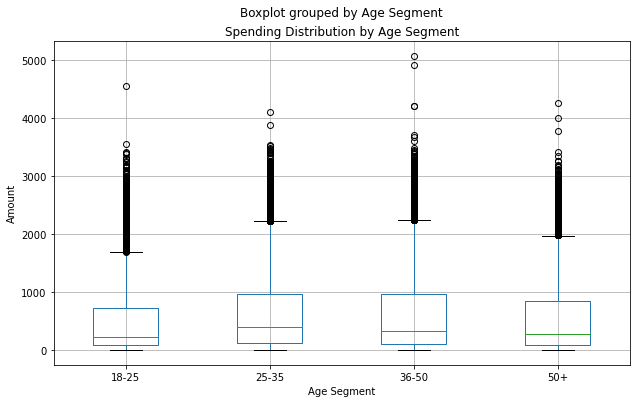

In [141]:
fig, ax = plt.subplots(figsize=(10,6)) # Set figure size to 10x6 inches
dataframe.boxplot(column='Revenue', by='Age Segment', ax=ax)
ax.set_title('Spending Distribution by Age Segment')
ax.set_xlabel('Age Segment')
ax.set_ylabel('Amount')
plt.show()

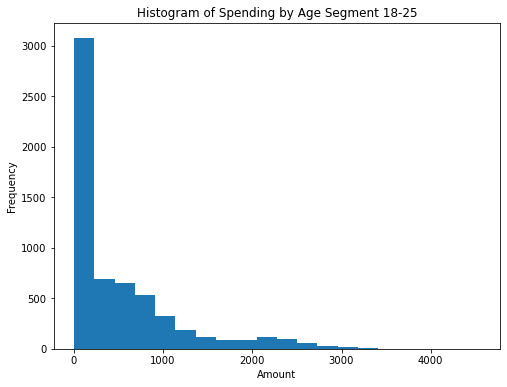

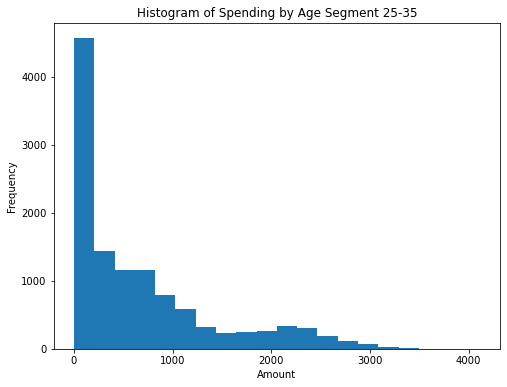

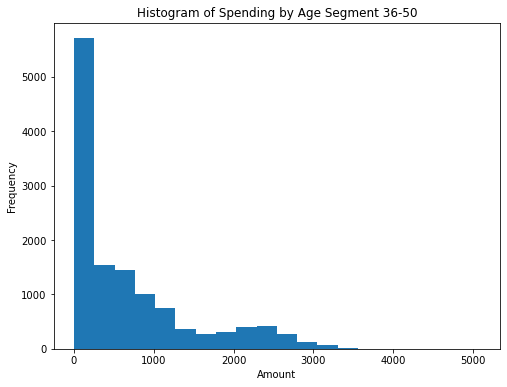

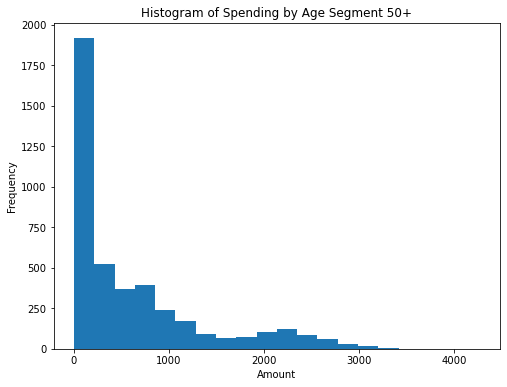

In [154]:
for label, grp in dataframe.groupby('Age Segment'):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(grp['Revenue'], bins=20)
    ax.set_title(f'Histogram of Spending by Age Segment {label}')
    ax.set_xlabel('Amount')
    ax.set_ylabel('Frequency')
    plt.show()


In [169]:
cost=pd.cut(dataframe['Cost'],10)
cc=cost.value_counts()
cc

(-1.598, 361.8]     19145
(361.8, 721.6]       5895
(721.6, 1081.4]      3935
(2160.8, 2520.6]     2990
(1081.4, 1441.2]     1480
(1441.2, 1801.0]      946
(1801.0, 2160.8]      463
(2880.4, 3240.2]        6
(2520.6, 2880.4]        4
(3240.2, 3600.0]        2
Name: Cost, dtype: int64

Text(0.5, 0, 'Most Spending Cost Range')

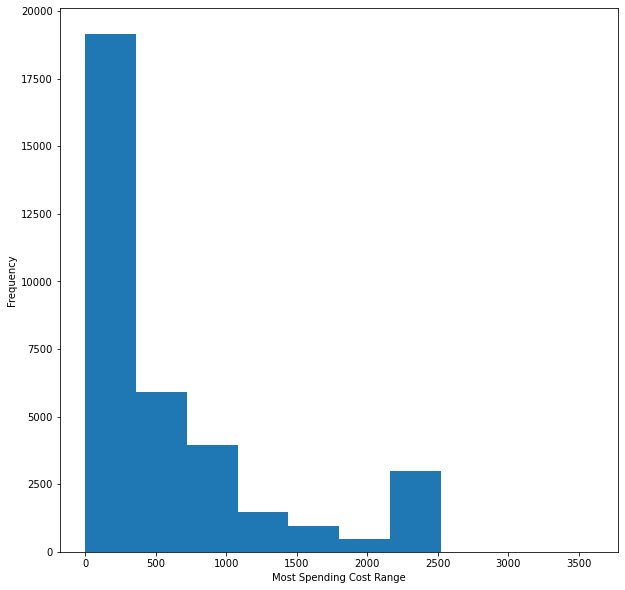

In [171]:
ax = (dataframe["Cost"]).plot.hist(figsize=(10, 10)) 
ax.set_xlabel('Most Spending Cost Range')

There Are some of the more ways to segment the data :


(1)Income: Segmenting customers by income level is a common practice, as higher-income customers may have different spending patterns than lower-income customers.

(2)Geography: Segmenting customers by geographic location can be useful for identifying regional spending patterns or targeting specific markets.

(3)Gender: Some businesses may find it useful to segment their customers by gender, as men and women may have different spending habits.

(4)Purchase history: Analyzing customers' purchase history can reveal spending patterns related to certain product categories or types of purchases.

(5)Loyalty status: Segmenting customers by their loyalty status, such as frequent shoppers or first-time customers, can help businesses identify spending patterns related to customer retention and loyalty programs.

(6)Time of day/week/month: Analyzing spending patterns by time of day, week, or month can provide insights into customer behavior related to specific times or seasons.

(7)Purchase frequency: Segmenting customers based on their purchase frequency can help identify the most loyal customers and target them with special promotions or rewards.

(8)Can also Segment customer by thier spending and classify them as (A,B,C)


We work on 2,3,6 because 1,4,7 needs customer id which we dont have in this data

# SEGMENTATION BY GEOGRAPHY

Segmenting customers by geographic location can be useful for identifying regional spending patterns or targeting specific markets.



visualize the distribution of customers by location

In [213]:
dataframe['State'].describe()

count          34866
unique            45
top       California
freq           10332
Name: State, dtype: object

In [232]:
freq={}
for i in dataframe['State']:
    if i in freq:
        freq[i]+=1
    else:
        freq[i]=1

In [233]:
freq

{'Washington': 5204,
 'California': 10332,
 'Oregon': 2446,
 'Essonne': 465,
 'Yveline': 442,
 'England': 6421,
 'Hessen': 1112,
 'Hamburg': 869,
 'Seine Saint Denis': 796,
 'Saarland': 1287,
 'Nordrhein-Westfalen': 1171,
 'Bayern': 668,
 'Seine (Paris)': 1092,
 'Pas de Calais': 42,
 'Moselle': 181,
 'Hauts de Seine': 509,
 'Nord': 787,
 'Seine et Marne': 183,
 'Loiret': 178,
 'Charente-Maritime': 70,
 'Loir et Cher': 57,
 'Brandenburg': 94,
 'Alabama': 2,
 "Val d'Oise": 130,
 'Val de Marne': 75,
 'Minnesota': 3,
 'Wyoming': 3,
 'Ohio': 13,
 'Garonne (Haute)': 100,
 'Kentucky': 4,
 'Texas': 14,
 'Missouri': 1,
 'Somme': 61,
 'New York': 10,
 'Florida': 7,
 'Illinois': 14,
 'South Carolina': 5,
 'North Carolina': 2,
 'Georgia': 2,
 'Virginia': 2,
 'Mississippi': 2,
 'Montana': 2,
 'Arizona': 2,
 'Massachusetts': 1,
 'Utah': 5}

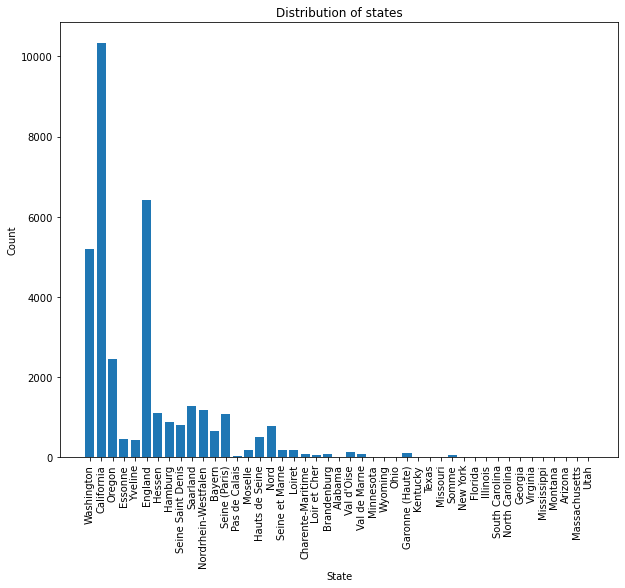

In [240]:
plt.figure(figsize=(10,8))
plt.bar(freq.keys(), freq.values())
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of states')
plt.show()
#We can say that the people of california spends more than all the cities as we can see they spend way more than every city as they look like outlier thier

In [245]:
import requests

cities = ['Washington', 'California', 'Oregon', 'Essonne', 'Yveline', 'England', 'Hessen', 'Hamburg', 'Seine Saint Denis', 'Saarland', 'Nordrhein-Westfalen', 'Bayern', 'Seine (Paris)', 'Pas de Calais', 'Moselle', 'Hauts de Seine', 'Nord', 'Seine et Marne', 'Loiret', 'Charente-Maritime', 'Loir et Cher', 'Brandenburg', 'Alabama', "Val d'Oise", 'Val de Marne', 'Minnesota', 'Wyoming', 'Ohio', 'Garonne (Haute)', 'Kentucky', 'Texas', 'Missouri', 'Somme', 'New York', 'Florida', 'Illinois', 'South Carolina', 'North Carolina', 'Georgia', 'Virginia', 'Mississippi', 'Montana', 'Arizona', 'Massachusetts', 'Utah']
data=[]
for city in cities:
    url = f"https://nominatim.openstreetmap.org/search?q={city}&format=json&limit=1"
    response = requests.get(url).json()
    if response:
        lat = response[0]['lat']
        lon = response[0]['lon']
        data.append(f"{city}: ({lat}, {lon})")


In [250]:
df=pd.DataFrame(data)
df

,0
0,"Washington: (38.8950368, -77.0365427)"
1,"California: (36.7014631, -118.755997)"
2,"Oregon: (43.9792797, -120.737257)"
3,"Essonne: (48.53034015, 2.239291805668168)"
4,"Yveline: (48.8544497, 2.3357512)"
5,"England: (52.5310214, -1.2649062)"
6,"Hessen: (50.6080651, 9.0284647)"
7,"Hamburg: (53.550341, 10.000654)"
8,"Seine Saint Denis: (48.9098125, 2.452863478446..."
9,"Saarland: (49.3841872, 6.9537369)"


In [254]:
df=df[0].str.split(":",expand=True)

In [268]:
ll=[]
for i in dataframe['State']:
    for j in df.values:
        if i==j[0]:
            ll.append(j[1])

In [276]:
latitude=[]
longitude=[]
for i in ll:
    a=i.strip()
    b=a.split()
    latitude.append(b[0])
    longitude.append(b[1])

In [280]:
dataframe["Latitude"]=latitude
dataframe["Longitude"]=longitude

<ipython-input-280-9b1e2e308cd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Latitude"]=latitude
<ipython-input-280-9b1e2e308cd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Longitude"]=longitude


In [287]:
ff=dataframe['Latitude'].str.split("(",expand=True)[1]

In [293]:
dataframe['Latitude']=ff.str.extract("(\d+.\d+)")[0]

<ipython-input-293-1bed2f7c4093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Latitude']=ff.str.extract("(\d+.\d+)")[0]


In [300]:
lo=dataframe['Longitude'].str.extract("(\d+.\d+)")[0]
dataframe['Longitude']=lo

<ipython-input-300-16df239c2086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Longitude']=lo


In [306]:
Country=dataframe.groupby("Country")['State'].value_counts()
Country

Country         State              
France          Seine (Paris)           1092
                Seine Saint Denis        796
                Nord                     787
                Hauts de Seine           509
                Essonne                  465
                Yveline                  442
                Seine et Marne           183
                Moselle                  181
                Loiret                   178
                Val d'Oise               130
                Garonne (Haute)          100
                Val de Marne              75
                Charente-Maritime         70
                Somme                     61
                Loir et Cher              57
                Pas de Calais             42
Germany         Saarland                1287
                Nordrhein-Westfalen     1171
                Hessen                  1112
                Hamburg                  869
                Bayern                   668
                Bra

Checking the Revenue of purchases depends on Cities

Checking the product mostly buy by every city

39

Checking Revenue Country wise Cities